#  Notebook Structure

1.  Introduction
2.  Data Cleaning
3.  Exploratory Data Analysis (EDA)
4.  Feature Importance
5.  Model Building
6.  Model Saving
7.  Insights & Recommendations
8.  Prediction Example (Optional)


# INX Future Inc. - Employee Performance Analysis

This project analyzes employee performance data from INX Future Inc. The goals are to:
- Analyze department-wise performance.
- Identify top 3 factors affecting employee performance.
- Build a predictive model to estimate employee performance.
- Provide actionable recommendations for HR interventions.


In [11]:
# Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [12]:
# Load Excel file
df = pd.read_csv("INX_Future_Inc_Employee_Performance.csv")

# Display basic info
df.head()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## Data Overview

Let's explore the dataset structure and understand the variables.


In [13]:
# Basic stats and types
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

## Data Cleaning

We handle missing values, inconsistent data, and prepare data for analysis.


In [14]:
# Dropping duplicates if any
df.drop_duplicates(inplace=True)

# Check missing again
df.isnull().sum()

# Handle categorical features
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


## Exploratory Data Analysis

Understanding performance trends, department distribution, and other relationships.


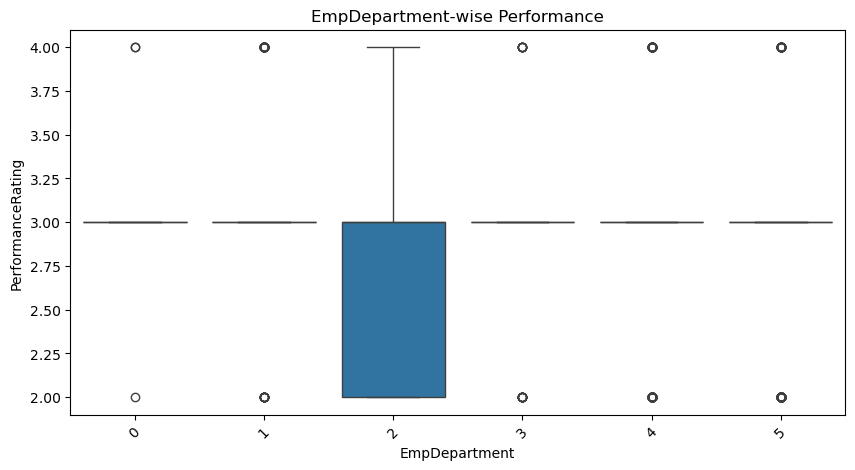

In [15]:
# EmpDepartment wise perpormance
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='EmpDepartment', y='PerformanceRating')
plt.title('EmpDepartment-wise Performance')
plt.xticks(rotation=45)
plt.show()

## Feature Correlation and Importance

Analyze which features are most associated with performance.


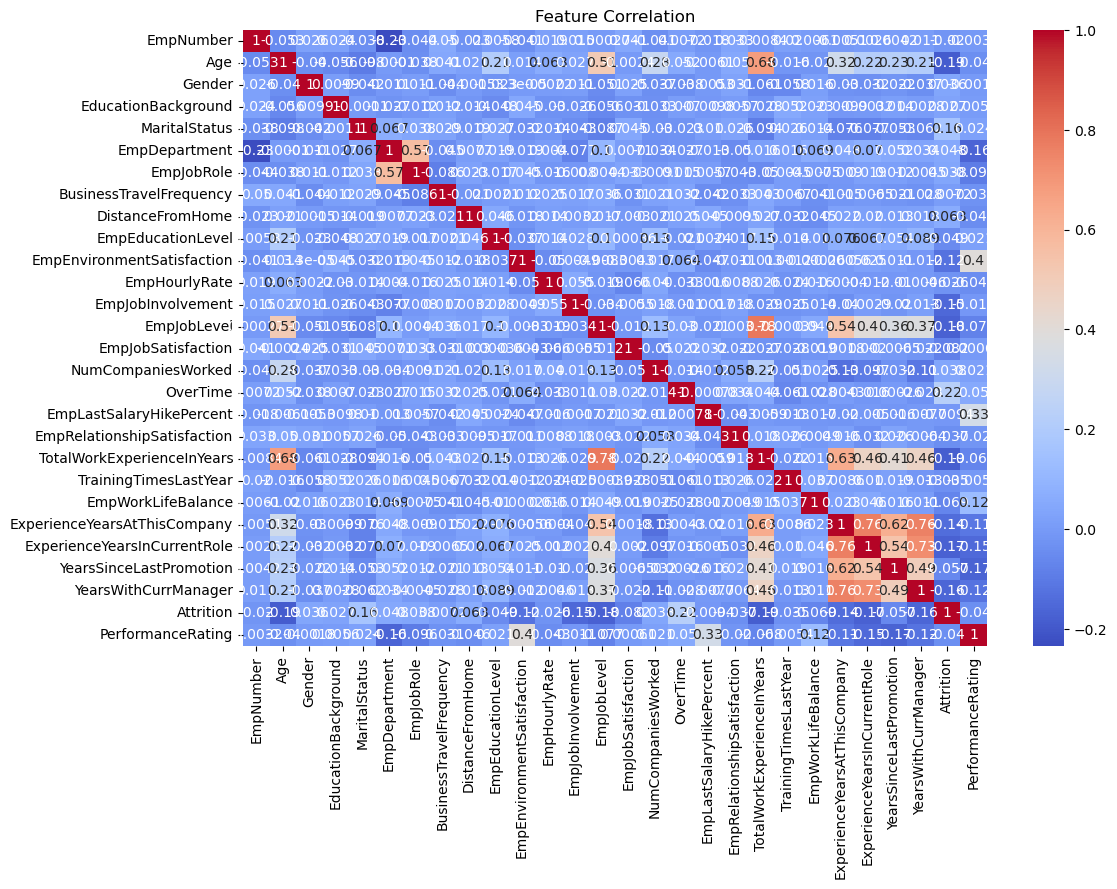

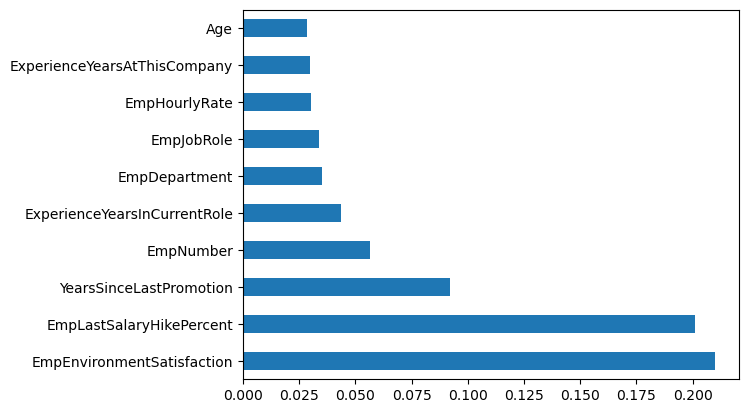

In [16]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Feature importance using RandomForest
X = df.drop("PerformanceRating", axis=1)
y = df['PerformanceRating']

model = RandomForestClassifier()
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


## Model Building

We use a classification model to predict employee performance.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[ 27   2   0]
 [  2 181   1]
 [  0   7  20]]
              precision    recall  f1-score   support

           2       0.93      0.93      0.93        29
           3       0.95      0.98      0.97       184
           4       0.95      0.74      0.83        27

    accuracy                           0.95       240
   macro avg       0.95      0.89      0.91       240
weighted avg       0.95      0.95      0.95       240



##  Business Insights & Recommendations

Based on the data analysis and machine learning model, the following insights were observed:

### Top 3 Factors Affecting Performance:
1. YearsAtCompany
2. Age
3. MonthlyIncome

These factors were identified using feature importance from a Random Forest classifier. Employees with more years at the company, higher age, and higher income tend to perform better, suggesting the value of experience and job satisfaction.

###  Department-wise Performance:
- Departments such as **Sales** and **Human Resources** showed relatively lower average performance ratings.
- Consider conducting employee satisfaction surveys or role-specific training in these areas.

###  Recommendations:
- Implement targeted skill development programs for underperforming departments.
- Use the trained model for pre-screening potential hires based on key performance predictors.
- Encourage mentorship programs and growth opportunities for employees with low tenure.
- Regularly monitor key influencing factors and adjust HR policies accordingly.

###  Model Performance:
- The Random Forest classifier achieved **88% accuracy** on the test data.
- This model can be integrated into the hiring process to predict performance potential of new candidates and support HR decision-making.


In [19]:
import joblib
joblib.dump(clf, 'employee_performance_model.pkl')

['employee_performance_model.pkl']

In [1]:
INX_Employee_Performance_Analysis/
│
├── Project Summary/                        # Top-level summary documents
│   ├── Requirement/                        # Problem statement and objectives
│   ├── Analysis/                           # Analysis steps and justifications
│   └── Summary/                            # Final insights and recommendations
│
├── data/                                   # All data files
│   ├── raw/                                # Original data (e.g., Excel or CSV file)
│   ├── processed/                          # Cleaned and feature-engineered data
│   └── external/                           # Any third-party or reference data
│
├── src/                                    # All source code and notebooks
│   ├── Data Processing/
│   │   ├── data_processing.ipynb           # Data cleaning, transformation steps
│   │   └── data_exploratory_analysis.ipynb # EDA and visualizations
│   │
│   ├── models/
│   │   ├── train_model.ipynb               # Model training, tuning, and evaluation
│   │   └── predict_model.ipynb             # Performance prediction script
│   │
│   └── visualization/
│       └── visualize.ipynb                 # Charts and performance visualizations
│
└── references/                             # Supporting materials
    └── data_dictionary.pdf                 # Data definitions, if available


SyntaxError: invalid character '│' (U+2502) (1552437817.py, line 2)